<span STYLE="font-size:200%"> 
    Barplot Side-By-Side
</span>

Docker image: gnasello/datascience-env:2024-06-12\
Latest update: 12 June 2024

# Load required packages

In [1]:
library(ggplot2)
library(dplyr)
library(ggplotUtils)
library(statsUtils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

In [2]:
filetable <- 'data.csv'

title <- 'Plot Title'
xlabel <- ' '
ylabel <- expression(paste('Defect Area ',(mm^2)))
xlabels_ordered <- c('Blank', '100 μg AS', '1 mg AS')
scale_color_manual.values <- c("#8b8c8cff", "#ffca73ff", "#dca01c")

# color of each group
scale_color_fill.values <- c('#ffffffff', '#ffffffff')

df <- read.csv(filetable)
head(df)
tail(df)

,y,x,group
,<dbl>,<chr>,<chr>
1,14.728607,1 mg AS,Week 8
2,10.550889,1 mg AS,Week 8
3,9.948779,1 mg AS,Week 8
4,13.052791,1 mg AS,Week 8
5,10.276099,1 mg AS,Week 8
6,10.531006,100 μg AS,Week 8


,y,x,group
,<dbl>,<chr>,<chr>
20,14.61260,100 μg AS,Week 4
21,11.62888,100 μg AS,Week 4
22,15.55028,Blank,Week 4
23,15.68649,Blank,Week 4
24,13.34216,Blank,Week 4
25,12.80022,Blank,Week 4


## Order x labels

Order data frame rows according to vector with specific order

In [3]:
if (exists("xlabels_ordered")) {
    df <- df %>%
            mutate(x = factor(x, levels=xlabels_ordered))
    }

# Bar plot of `y` over `x`

## Summarize the data

The function below will be used to calculate the mean and the standard deviation, for the variable of interest, in each group. See [tutorial](http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization#line-graph-with-error-bars)

In [4]:
df_summary <- data_summary(df, varname='y',
                           groupnames=c('x', 'group'))
df_summary

x,group,mean,sd
<fct>,<chr>,<dbl>,<dbl>
Blank,Week 4,14.34479,1.488212
Blank,Week 8,13.97726,0.921557
100 μg AS,Week 4,12.57713,2.871559
100 μg AS,Week 8,12.19825,2.357835
1 mg AS,Week 4,13.05200,1.877304
1 mg AS,Week 8,11.71143,2.086659


## Bar plot with point data

Warning message in geom_errorbar(data = df_summary, aes(x = x, y = mean, ymin = mean - :
“Ignoring unknown aesthetics: fill”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


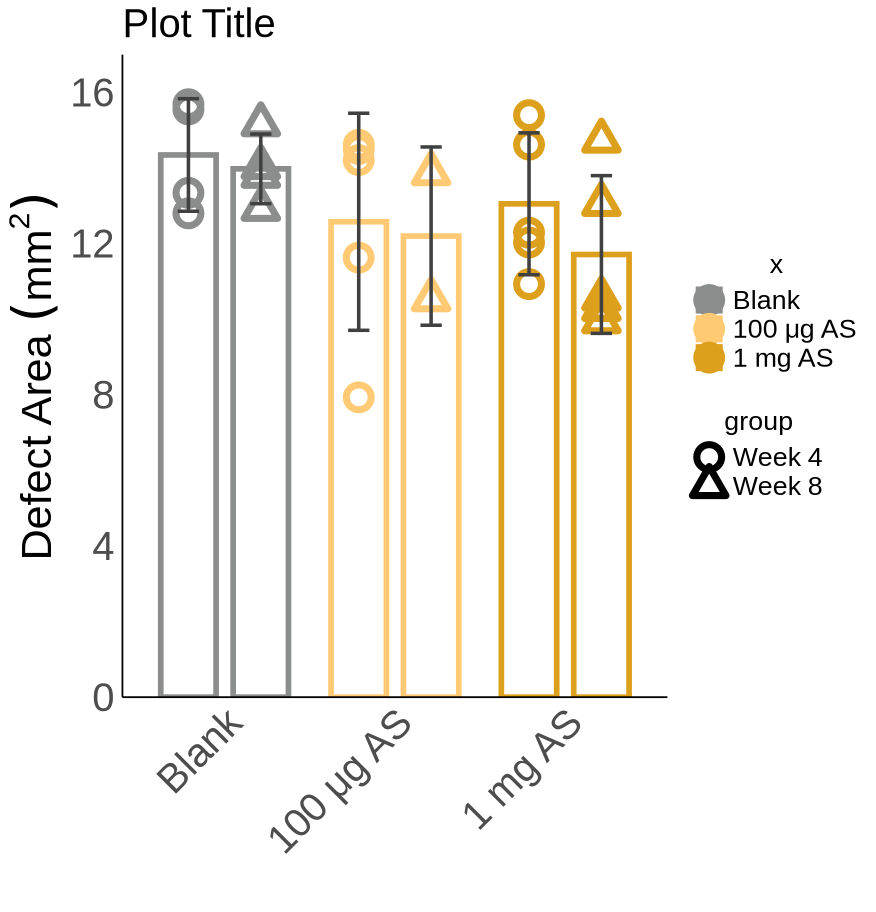

In [5]:
color='#404040ff'

ylim <- c(0,17)
width=7.3
height=7.6

p <- ggplot() +
     geom_bar(data=df_summary, aes(x=x, y=mean, color=x, fill=group), stat = "identity", position=position_dodge(width = 0.85), width = 0.65, linewidth=1.6) + 
     geom_point(data=df, aes(x = x, y = y, color=factor(x), fill=group, shape=group), position=position_dodge(width = 0.85), size=5, stroke=3) +
     geom_errorbar(data=df_summary, aes(x=x, y=mean, ymin=mean-sd, ymax=mean+sd, fill=group), position=position_dodge(width = 0.85), width=.25, linewidth=1, color=color) 


img <- ggplotMinAethetics(p, width=width, height=height,
                           title=title,
                           plot.title = element_text(size = 24),
                           axis.text=element_text(size=24),
                           axis.title=element_text(size=26),
                           xlabel = xlabel, 
                           ylabel= ylabel, 
                           ylim = ylim,
                           x.text.angle=45,
                           scale_color_manual.values = scale_color_manual.values
                           # legend.position="none"
                          ) + 
            theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
            scale_fill_manual(values = scale_color_fill.values) + 
            scale_shape_manual(values = c(1, 2)) # 1-circle, 2-triangle point up 

img

# Export plot

In [6]:
filename <- tools::file_path_sans_ext(filetable)
filename

[1] "data"

## `.png` file

In [7]:
fileoutput <- paste(filename,'.png', sep='')
fileoutput

[1] "data.png"

In [8]:
ggsave(file=fileoutput, plot=img, width=width, height=height, bg='white')

## `.svg` file

In [9]:
fileoutput <- paste(filename,'.svg', sep='')
fileoutput

[1] "data.svg"

In [10]:
ggsave(file=fileoutput, plot=img, width=width, height=height)